In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv("my_keys.env")

True

In [3]:
alpaca_api_key = os.getenv("Alpace_API_Key")
alpaca_secret_key = os.getenv("Alpaca_API_Secret_Key")
type(alpaca_api_key)

str

In [4]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
# Format current date as ISO format
end_date = pd.Timestamp("2021-04-30", tz="America/New_York").isoformat()
start_date = pd.Timestamp("2019-11-30", tz="America/New_York").isoformat()

In [6]:
# Set the tickers
tickers = ["SPY", "LQD", "UNG", "PFE", "VNQ"]

In [7]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [8]:
etfs = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
etfs.index = etfs.index.date

In [9]:
eft_closing_prices_df = pd.DataFrame()

eft_closing_prices_df["LQD"] = etfs["LQD"]["close"]
eft_closing_prices_df["PFE"] = etfs["PFE"]["close"]
eft_closing_prices_df["SPY"] = etfs["SPY"]["close"]
eft_closing_prices_df["UNG"] = etfs["UNG"]["close"]
eft_closing_prices_df["VNQ"] = etfs["VNQ"]["close"]


In [10]:
eft_closing_prices_df.head()

,LQD,PFE,SPY,UNG,VNQ
2019-12-02,127.05,38.30,311.60,17.950,91.65
2019-12-03,128.05,38.05,309.47,18.730,92.25
2019-12-04,127.87,38.14,311.47,18.510,92.63
2019-12-05,127.75,38.03,312.04,18.530,92.69
2019-12-06,127.67,38.29,314.82,18.025,92.87


In [11]:
# Creating a column for 20 day moving average
eft_closing_prices_df["MovAvg20dLQD"] = eft_closing_prices_df["LQD"].rolling(window=20).mean()
eft_closing_prices_df["MovAvg20dPFE"] = eft_closing_prices_df["PFE"].rolling(window=20).mean()
eft_closing_prices_df["MovAvg20dSPY"] = eft_closing_prices_df["SPY"].rolling(window=20).mean()
eft_closing_prices_df["MovAvg20dUNG"] = eft_closing_prices_df["UNG"].rolling(window=20).mean()
eft_closing_prices_df["MovAvg20dVNQ"] = eft_closing_prices_df["VNQ"].rolling(window=20).mean()

In [12]:
# Creating a column for 20 days stadard deviation 
eft_closing_prices_df["StDevLQD"] = eft_closing_prices_df["LQD"].rolling(window=20).std()
eft_closing_prices_df["StDevPFE"] = eft_closing_prices_df["PFE"].rolling(window=20).std()
eft_closing_prices_df["StDevSPY"] = eft_closing_prices_df["SPY"].rolling(window=20).std()
eft_closing_prices_df["StDevUNG"] = eft_closing_prices_df["UNG"].rolling(window=20).std()
eft_closing_prices_df["StDevVNQ"] = eft_closing_prices_df["VNQ"].rolling(window=20).std()

Text(0, 0.5, 'LQD')

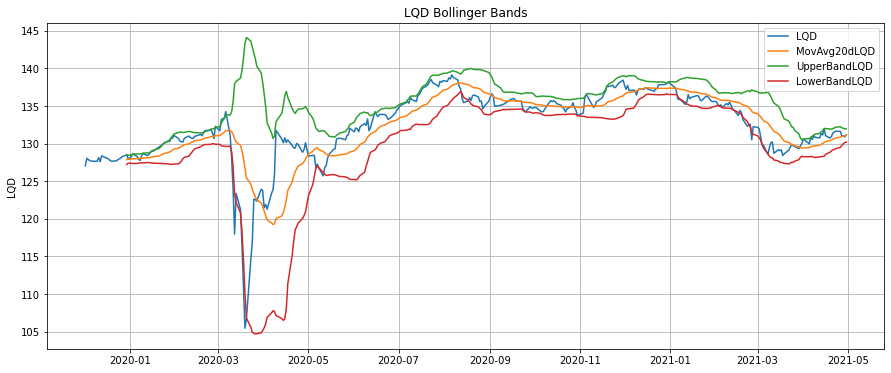

In [13]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
eft_closing_prices_df["UpperBandLQD"] = eft_closing_prices_df["MovAvg20dLQD"] + (eft_closing_prices_df["StDevLQD"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
eft_closing_prices_df["LowerBandLQD"] = eft_closing_prices_df["MovAvg20dLQD"] - (eft_closing_prices_df["StDevLQD"] * 2)

# Plotting
eft_closing_prices_df[["LQD","MovAvg20dLQD","UpperBandLQD","LowerBandLQD"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("LQD Bollinger Bands")
plt.axis("tight")
plt.ylabel("LQD")

Text(0, 0.5, 'PFE')

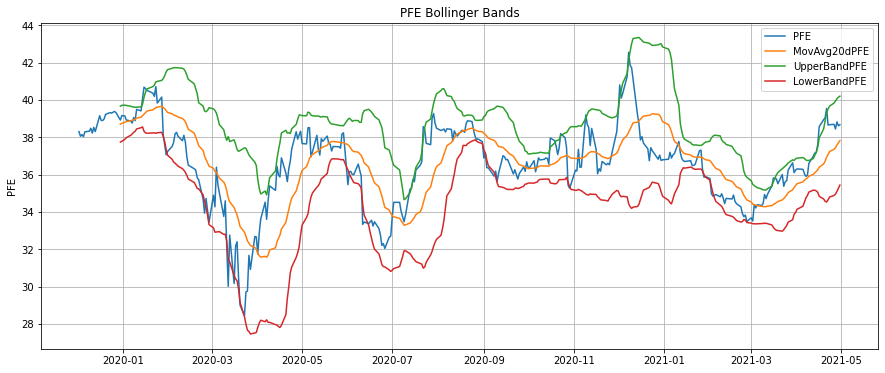

In [14]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
eft_closing_prices_df["UpperBandPFE"] = eft_closing_prices_df["MovAvg20dPFE"] + (eft_closing_prices_df["StDevPFE"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
eft_closing_prices_df["LowerBandPFE"] = eft_closing_prices_df["MovAvg20dPFE"] - (eft_closing_prices_df["StDevPFE"] * 2)

# Plotting
eft_closing_prices_df[["PFE","MovAvg20dPFE","UpperBandPFE","LowerBandPFE"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("PFE Bollinger Bands")
plt.axis("tight")
plt.ylabel("PFE")

Text(0, 0.5, 'SPY')

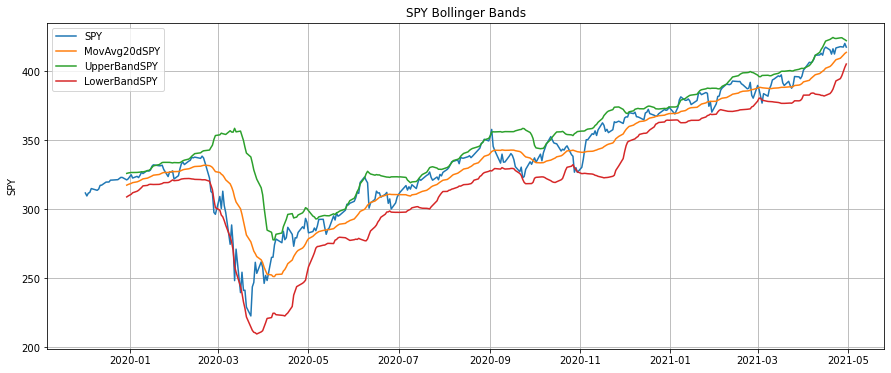

In [15]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
eft_closing_prices_df["UpperBandSPY"] = eft_closing_prices_df["MovAvg20dSPY"] + (eft_closing_prices_df["StDevSPY"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
eft_closing_prices_df["LowerBandSPY"] = eft_closing_prices_df["MovAvg20dSPY"] - (eft_closing_prices_df["StDevSPY"] * 2)

# Plotting
eft_closing_prices_df[["SPY","MovAvg20dSPY","UpperBandSPY","LowerBandSPY"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("SPY Bollinger Bands")
plt.axis("tight")
plt.ylabel("SPY")

Text(0, 0.5, 'UNG')

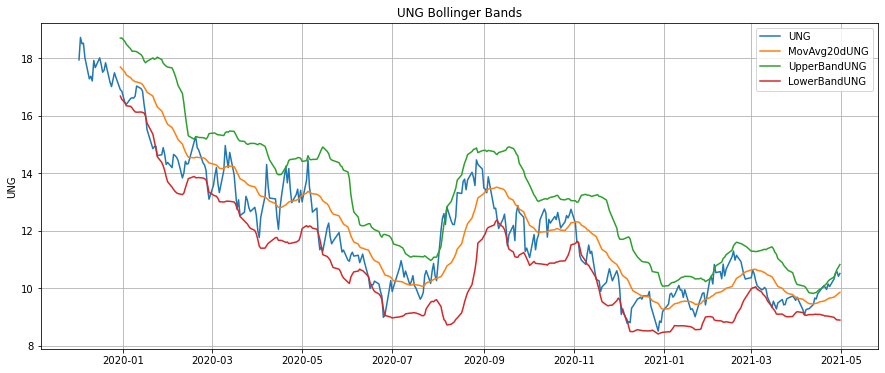

In [16]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
eft_closing_prices_df["UpperBandUNG"] = eft_closing_prices_df["MovAvg20dUNG"] + (eft_closing_prices_df["StDevUNG"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
eft_closing_prices_df["LowerBandUNG"] = eft_closing_prices_df["MovAvg20dUNG"] - (eft_closing_prices_df["StDevUNG"] * 2)

# Plotting
eft_closing_prices_df[["UNG","MovAvg20dUNG","UpperBandUNG","LowerBandUNG"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("UNG Bollinger Bands")
plt.axis("tight")
plt.ylabel("UNG")

Text(0, 0.5, 'VNQ')

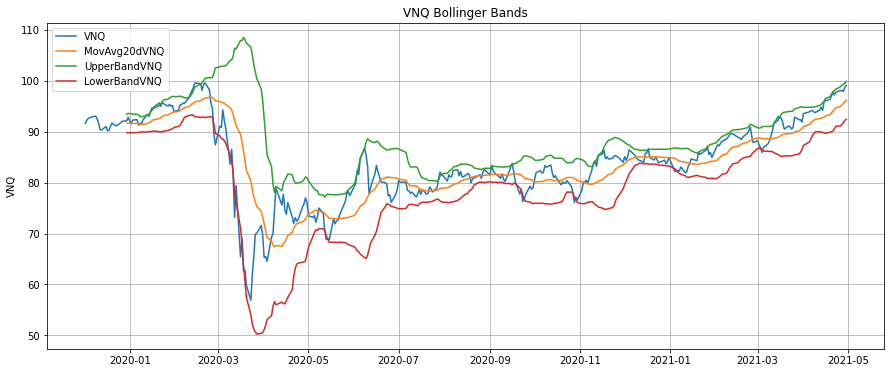

In [17]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
eft_closing_prices_df["UpperBandVNQ"] = eft_closing_prices_df["MovAvg20dVNQ"] + (eft_closing_prices_df["StDevVNQ"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
eft_closing_prices_df["LowerBandVNQ"] = eft_closing_prices_df["MovAvg20dVNQ"] - (eft_closing_prices_df["StDevVNQ"] * 2)

# Plotting
eft_closing_prices_df[["VNQ","MovAvg20dVNQ","UpperBandVNQ","LowerBandVNQ"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("VNQ Bollinger Bands")
plt.axis("tight")
plt.ylabel("VNQ")